# Data Cleansing

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [2]:
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [3]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [4]:
# Checking for any missing values
df.isnull().sum().any()

False

In [5]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [6]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
num_no = (df['Diabetes_binary']==0.0).sum()
print('No diabetes:', num_no)

diab = (df['Diabetes_binary']==1.0).sum()
print('Diabetes:', diab)


No diabetes: 35346
Diabetes: 35346


In [8]:
lifestyle = df.loc[:, ['Diabetes_binary', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
                  'GenHlth', 'MentHlth', 'Education', 'Income']]

lifestyle.head()

genetics = df.loc[:, ['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Sex', 'Age']]

genetics.head()

,Diabetes_binary,HighBP,HighChol,BMI,Sex,Age
0,0.0,1.0,0.0,26.0,1.0,4.0
1,0.0,1.0,1.0,26.0,1.0,12.0
2,0.0,0.0,0.0,26.0,1.0,13.0
3,0.0,1.0,1.0,28.0,1.0,11.0
4,0.0,0.0,0.0,29.0,0.0,8.0


In [9]:
df = df.replace({'CholCheck':{0.0 : 'No', 1.0 : 'Yes'},
                       'Smoker': {0.0 : 'No', 1.0 : 'Yes'},
                       'Stroke':{0.0 : 'No', 1.0 : 'Yes'},
                       'HeartDiseaseorAttack':{0.0 : 'No', 1.0 : 'Yes'},
                       'PhysActivity':{0.0 : 'No', 1.0 : 'Yes'},
                       'Fruits':{0.0 : 'No', 1.0 : 'Yes'},
                       'Veggies':{0.0 : 'No', 1.0 : 'Yes'},
                       'HvyAlcoholConsump':{0.0 : 'No', 1.0 : 'Yes'},
                       'AnyHealthcare':{0.0 : 'No', 1.0 : 'Yes'},
                       'NoDocbcCost':{0.0 : 'No', 1.0 : 'Yes'},
                       'DiffWalk':{0.0 : 'No', 1.0 : 'Yes'}})

print(df.head())

   Diabetes_binary  HighBP  HighChol CholCheck   BMI Smoker Stroke  \
0              0.0     1.0       0.0       Yes  26.0     No     No   
1              0.0     1.0       1.0       Yes  26.0    Yes    Yes   
2              0.0     0.0       0.0       Yes  26.0     No     No   
3              0.0     1.0       1.0       Yes  28.0    Yes     No   
4              0.0     0.0       0.0       Yes  29.0    Yes     No   

  HeartDiseaseorAttack PhysActivity Fruits  ... AnyHealthcare NoDocbcCost  \
0                   No          Yes     No  ...           Yes          No   
1                   No           No    Yes  ...           Yes          No   
2                   No          Yes    Yes  ...           Yes          No   
3                   No          Yes    Yes  ...           Yes          No   
4                   No          Yes    Yes  ...           Yes          No   

  GenHlth MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  
0     3.0      5.0      30.0        No  1.0  

In [10]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck                object
BMI                     float64
Smoker                   object
Stroke                   object
HeartDiseaseorAttack     object
PhysActivity             object
Fruits                   object
Veggies                  object
HvyAlcoholConsump        object
AnyHealthcare            object
NoDocbcCost              object
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                 object
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

# Insights

## Descriptive Statistics: Uni-variate analysis

No diabetes (count): 35346
Diabetes (count): 35346
No diabetes (proportion): True     0.5
False    0.5
Name: Diabetes_binary, dtype: float64
Diabetes (proportion): False    0.5
True     0.5
Name: Diabetes_binary, dtype: float64


Text(0, 0.5, 'Number of Patients')

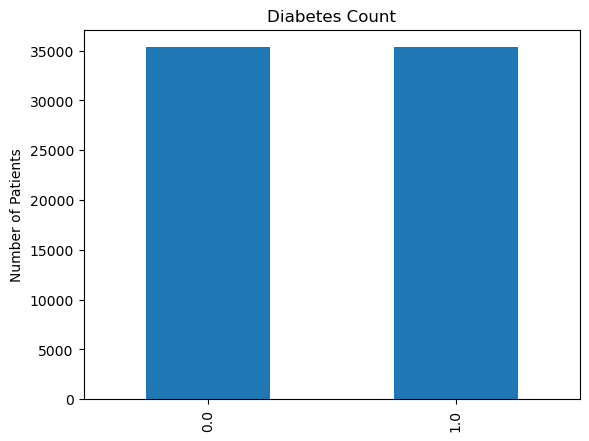

In [11]:
df['Diabetes_binary'].value_counts().plot(kind='bar')
plt.title('Diabetes Count')
# 0.0 - No diabetes
# 1.0 - Prediabetes

num_no = (df['Diabetes_binary']==0.0).sum()
print('No diabetes (count):', num_no)
diab = (df['Diabetes_binary']==1.0).sum()
print('Diabetes (count):', diab)

prop_no = (df['Diabetes_binary']==0.0).value_counts(normalize=True)
print('No diabetes (proportion):', prop_no)
prop_diab = (df['Diabetes_binary']==1.0).value_counts(normalize=True)
print('Diabetes (proportion):', prop_diab)

plt.ylabel('Number of Patients')

Text(0, 0.5, 'Number of Patients')

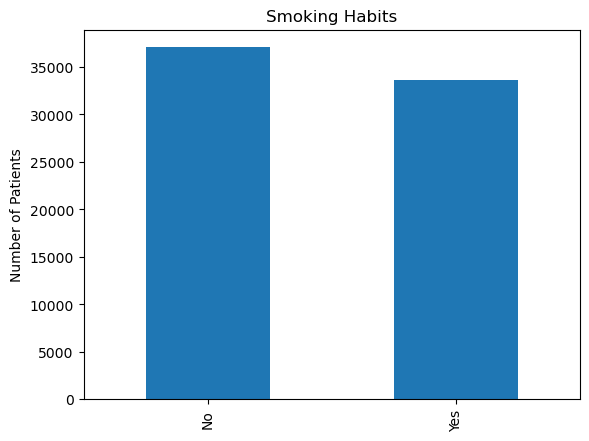

In [12]:
df['Smoker'].value_counts().plot(kind='bar')
plt.title('Smoking Habits')
plt.ylabel('Number of Patients')

Text(0.5, 1.0, 'Stroke')

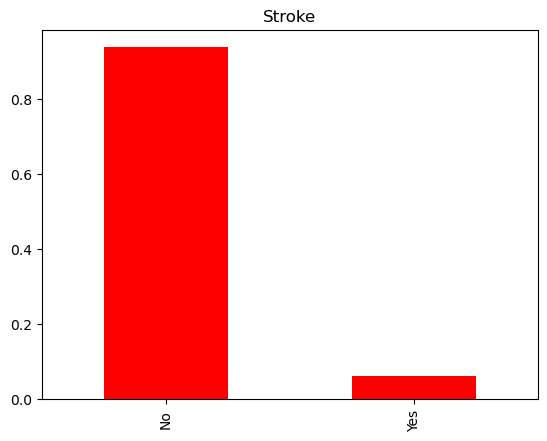

In [13]:
df['Stroke'].value_counts(normalize=True).plot(kind='bar', color='red')
plt.title('Stroke')

Text(0.5, 1.0, 'Heart Issues')

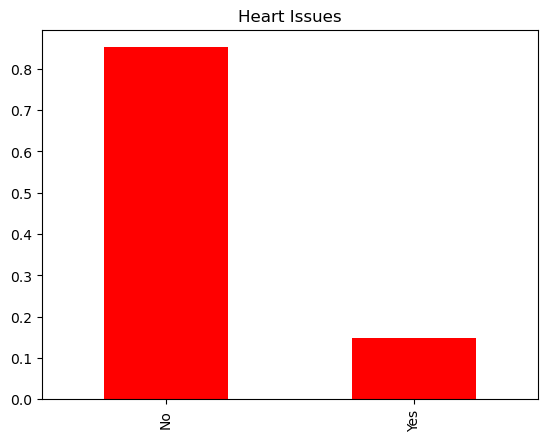

In [14]:
df['HeartDiseaseorAttack'].value_counts(normalize=True).plot(kind='bar', color='red')
plt.title('Heart Issues')

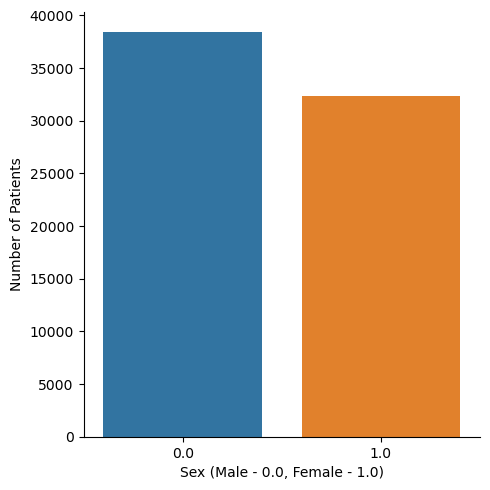

In [15]:
sns.catplot(x="Sex", data=df, kind='count')
plt.xlabel('Sex (Male - 0.0, Female - 1.0)')
plt.ylabel('Number of Patients')
plt.show()


# 0.0 is Male
# 1.0 is Female

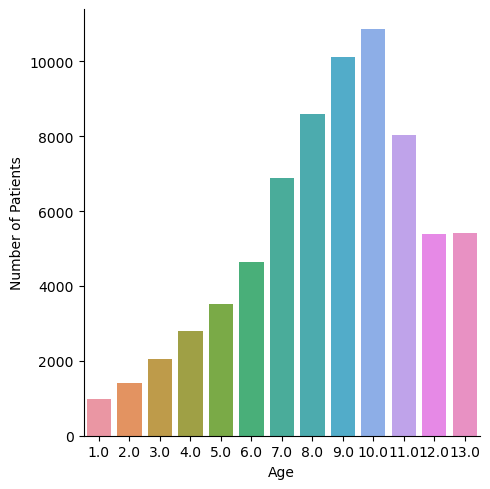

In [16]:
sns.catplot(x="Age", data=df, kind='count')
plt.ylabel('Number of Patients')
plt.show()


Age is binned into 13 different categories. Those 13 categories are listed below.

1: Age 18 to 24 
2: Age 25 to 29 
3: Age 30 to 34 
4: Age 35 to 39 
5: Age 40 to 44 
6: Age 45 to 49 
7: Age 50 to 54 
8: Age 55 to 59 
9: Age 60 to 64 
10: Age 65 to 69 
11: Age 70 to 74 
12: Age 75 to 79 
13 Age 80 or older

## Descriptive Statistics: Multivariate Analysis

### For reference throughout the analysis: Patients with diabetes: 1.0, Patients without diabetes: 0.0

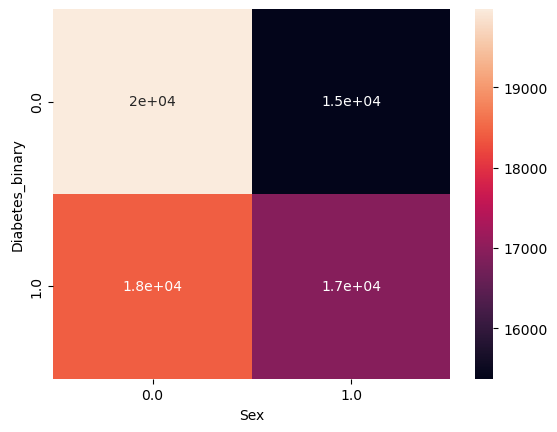

In [17]:
sns.heatmap(pd.crosstab(df['Diabetes_binary'], df['Sex']), annot=True);

This heatmap shows four categories. On the high end of the spectrum are males without diabetes. On the lower end of the spectrum are women without diabetes. There are more men with diabetes than women with diabetes. 

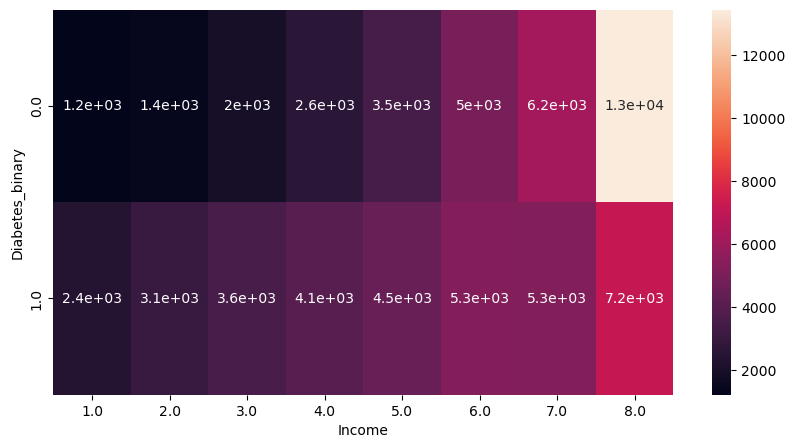

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(pd.crosstab(df['Diabetes_binary'], df['Income']), annot=True);

As income increases it appears that the number of patients with and without diabetes increase as well. This is likely due to the nature of people participating in the study.

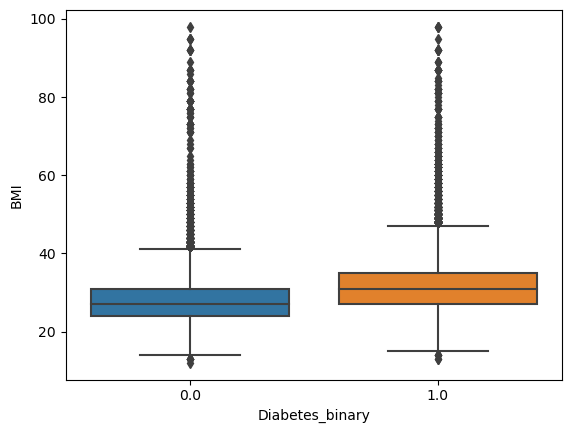

In [19]:
sns.boxplot(x="Diabetes_binary",y='BMI',data=df);

Text(48.78267283950616, 0.5, 'Number of Patients')

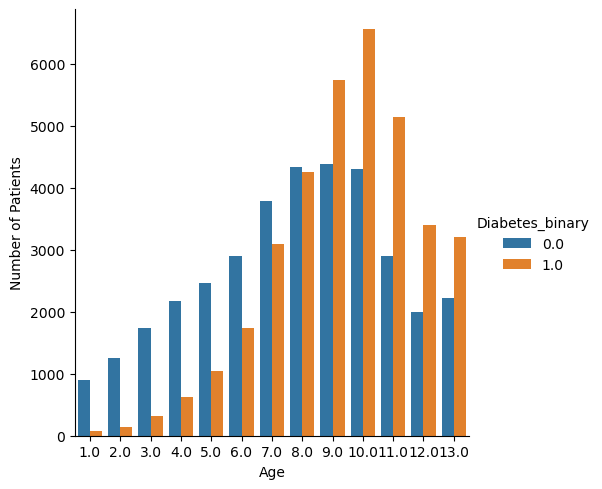

In [20]:
sns.catplot(x='Age', hue='Diabetes_binary', data=df, kind='count');
plt.ylabel('Number of Patients')

The top three age categories with the highest number of patients with diabetes are 9, 10 and 11. Included in these three categories are people ages 60 to 74. 

Text(36.327808770576155, 0.5, 'Number of Patients')

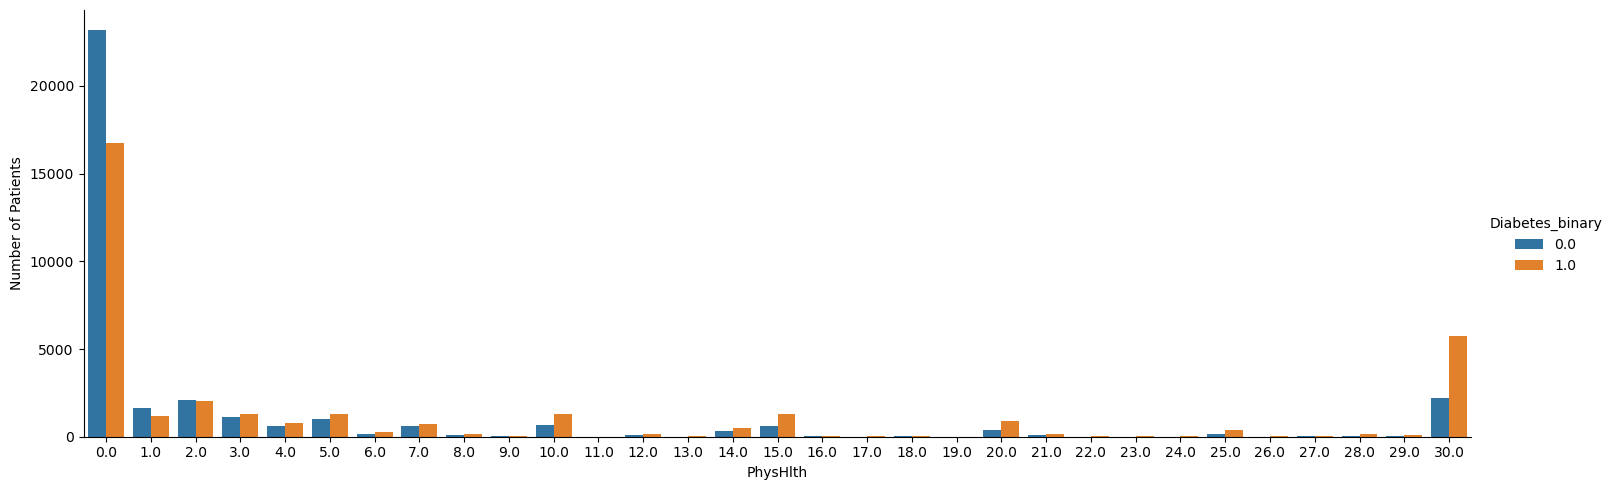

In [21]:
sns.catplot(x='PhysHlth', hue='Diabetes_binary', data=df, kind='count',  height=5, aspect=3);
plt.ylabel('Number of Patients')

Text(0, 0.5, 'Number of Patients')

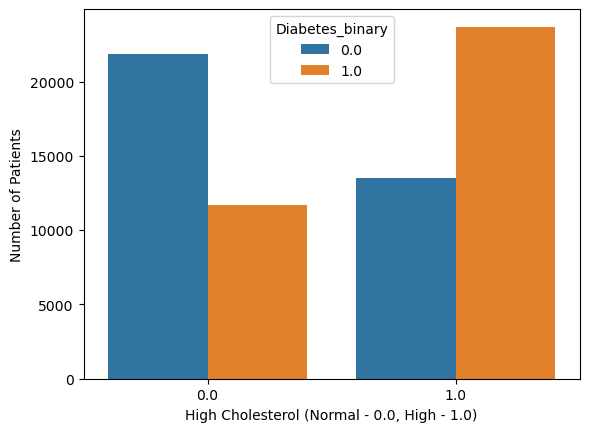

In [22]:
sns.countplot(x='HighChol', hue='Diabetes_binary', data=df);
plt.xlabel('High Cholesterol (Normal - 0.0, High - 1.0)')
plt.ylabel('Number of Patients')

High cholesterol does seem to factor into the amount of people who have diabetes as shown on the bar plot above. 

Text(0, 0.5, 'Number of Patients')

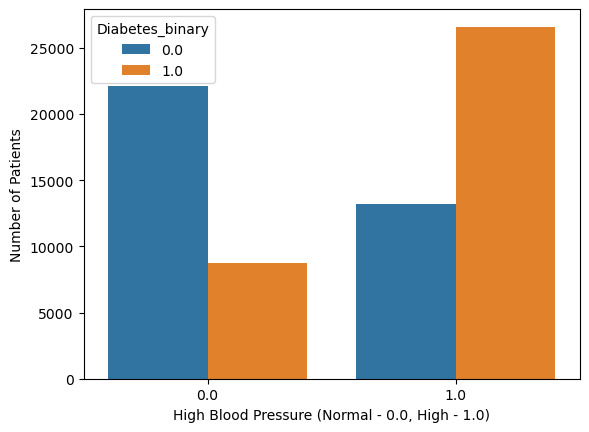

In [23]:
sns.countplot(x='HighBP', hue='Diabetes_binary', data=df);
plt.xlabel('High Blood Pressure (Normal - 0.0, High - 1.0)')
plt.ylabel('Number of Patients')

High blood pressure also appears to have significant affect on patients with diabetes. As seen above, the bar with the highest count is patients with high blood pressure with diabetes (1.0). 

### Major Health Issues

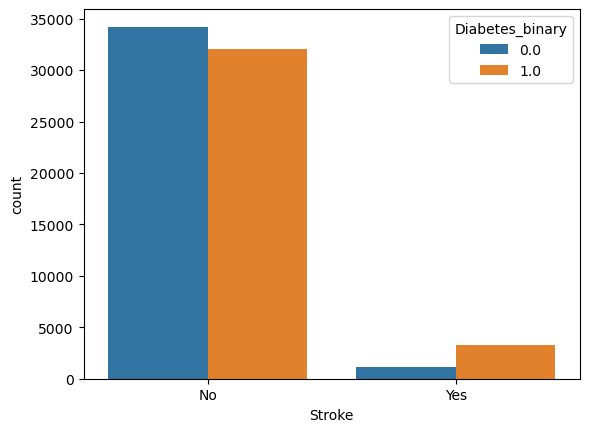

In [24]:
sns.countplot(x='Stroke', hue='Diabetes_binary', data=df);

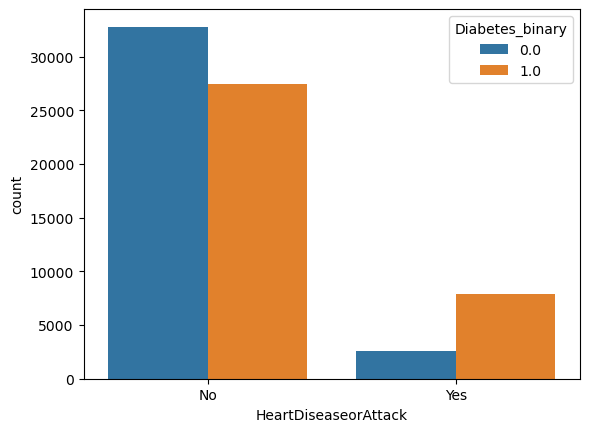

In [25]:
sns.countplot(x='HeartDiseaseorAttack', hue='Diabetes_binary', data=df);

Based on the current data, it appears that major health issues such as heart disease and stroke do not have much of an affect on whether a person has diabetes or not. This is possibly skewed by the data collection and in this study as seen in the two red charts above, there are far more patients without heart disease/history of stroke than those who have experienced either one. 

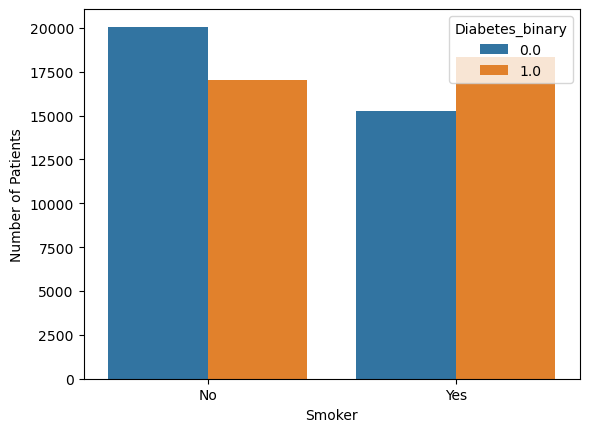

In [26]:
sns.countplot(x="Smoker", data=df, hue="Diabetes_binary")
plt.ylabel('Number of Patients')
plt.show()


It appears as though smoking may have less of an affect on whether or not a patient has diabetes than one would expect. There are similar amounts of non smokers with and without diabetes and the same goes for smokers with and without diabetes. 

In [27]:
df2 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')


In [28]:
df2['Sex'] = df2['Sex'].astype(int)
df2['HighBP'] = df2['HighBP'].astype(int)
df2['HighChol'] = df2['HighChol'].astype(int)
df2['Smoker'] = df2['Smoker'].astype(int)
df2['Stroke'] = df2['Stroke'].astype(int)
df2['HeartDiseaseorAttack'] = df2['HeartDiseaseorAttack'].astype(int)
df2['PhysActivity'] = df2['PhysActivity'].astype(int)
df2['Fruits'] = df2['Fruits'].astype(int)
df2['Veggies'] = df2['Veggies'].astype(int)
df2['HvyAlcoholConsump'] = df2['HvyAlcoholConsump'].astype(int)
df2['NoDocbcCost'] = df2['NoDocbcCost'].astype(int)
df2['DiffWalk'] = df2['DiffWalk'].astype(int)
df2['AnyHealthcare'] = df2['AnyHealthcare'].astype(int)
df2['Diabetes_binary'] = df2['Diabetes_binary'].astype(int)
df2['CholCheck'] = df2['CholCheck'].astype(int)


<Axes: >

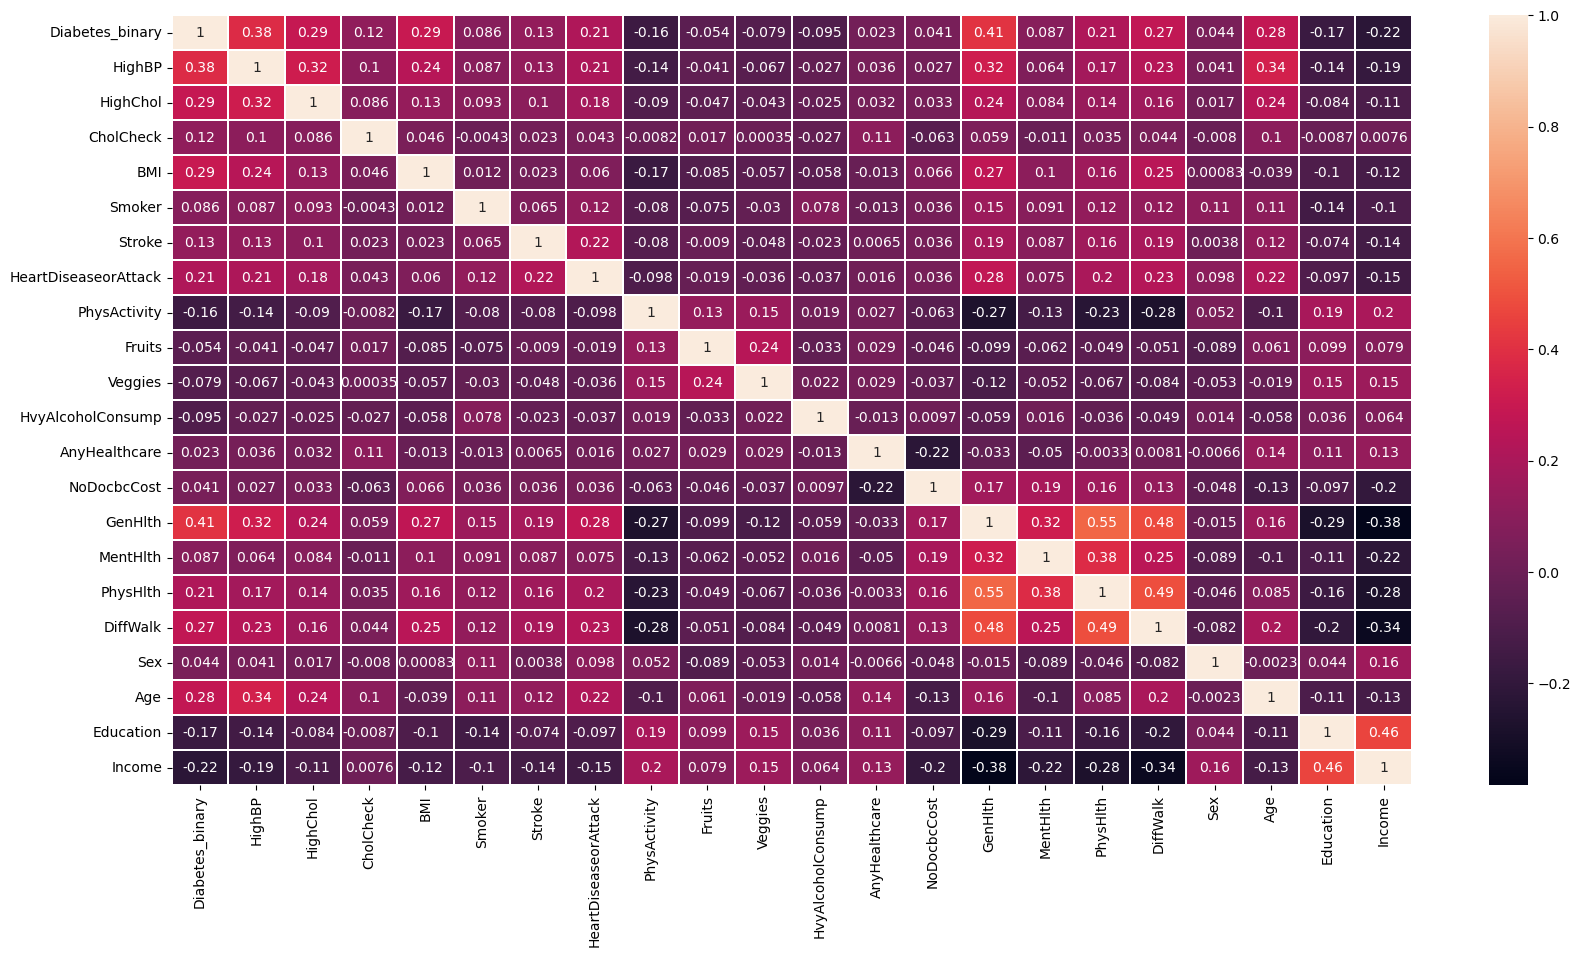

In [29]:
#specify size of heatmap
fig, ax = plt.subplots(figsize=(20, 10))

#create heatmap
sns.heatmap(df2.corr(), linewidths=.3, annot=True)

## Logistic Regression

### Statsmodels Regression

In [30]:
#Using Statsmodels for regression
Xtrain = df2[['BMI','Sex','HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack','PhysActivity','HvyAlcoholConsump',
            'Income','Age']]
ytrain = df2['Diabetes_binary']

log_reg = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.566518
         Iterations 6


In [31]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:                70692
Model:                          Logit   Df Residuals:                    70682
Method:                           MLE   Df Model:                            9
Date:                Sat, 30 Sep 2023   Pseudo R-squ.:                  0.1827
Time:                        11:58:22   Log-Likelihood:                -40048.
converged:                       True   LL-Null:                       -49000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
BMI                      0.0197      0.001     22.121      0.000       0.018       0.021
Sex                      0.2023      0.018     11.473      0.000       0.168       0.237
HighBP      

Based on this summary table, HighBP has the strongest correlation. When a person has high blood pressure instead of low/normal, their odds of having diabetes increases by approximately 0.77 in log-odds. For high cholesterol it is a lower value of approx. 0.27. For a person's sex on the other hand, when moving from female to male, log-odds of diabetes decreases by about 0.49. 

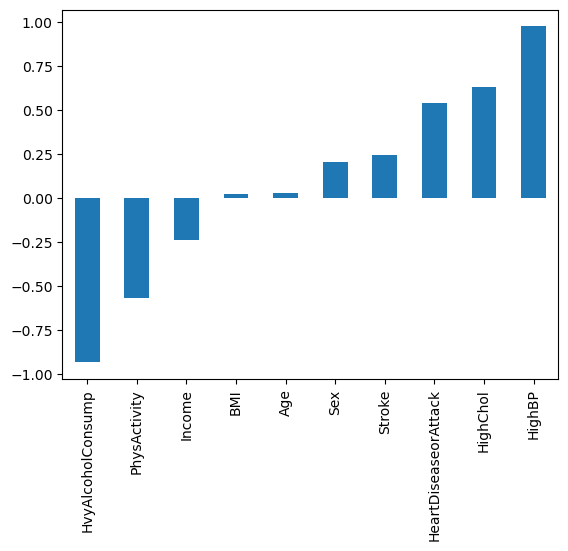

In [32]:
log_reg.params.sort_values().plot(kind='bar')
plt.show()

In [33]:
Xtest = df2[['BMI','Sex','HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack','PhysActivity','HvyAlcoholConsump',
            'Income','Age']]
ytest = df2['Diabetes_binary']
  
# performing predictions on the test dataset
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))

df2['prediction'] = prediction

df2.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,prediction
0,0,1,0,1,26.0,0,0,0,1,0,...,0,3.0,5.0,30.0,0,1,4.0,6.0,8.0,0
1,0,1,1,1,26.0,1,1,0,0,1,...,0,3.0,0.0,0.0,0,1,12.0,6.0,8.0,1
2,0,0,0,1,26.0,0,0,0,1,1,...,0,1.0,0.0,10.0,0,1,13.0,6.0,8.0,0
3,0,1,1,1,28.0,1,0,0,1,1,...,0,3.0,0.0,3.0,0,1,11.0,6.0,8.0,1
4,0,0,0,1,29.0,1,0,0,1,1,...,0,2.0,0.0,0.0,0,0,8.0,5.0,8.0,0


In [34]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
  
# confusion matrix
cm = confusion_matrix(ytest, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest, prediction))

Confusion Matrix : 
 [[24104 11242]
 [ 9021 26325]]
Test accuracy =  0.7133621909126917


## Regression Plots

<Axes: xlabel='BMI', ylabel='prediction'>

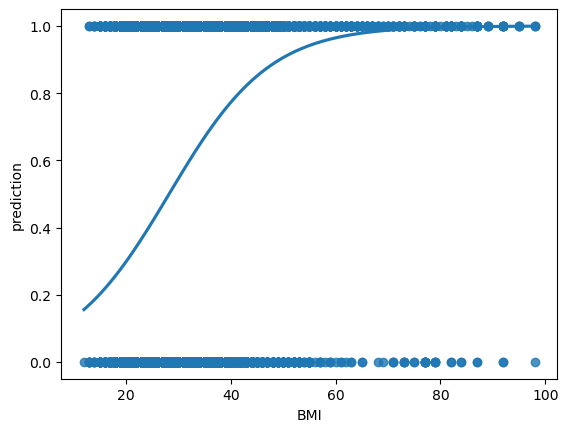

In [35]:
x = df2['BMI']
y = df2['prediction']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci = None)

The graph above displays the trend that as BMI increases, chances of diabetes go from zero to one. 

<Axes: xlabel='Sex', ylabel='prediction'>

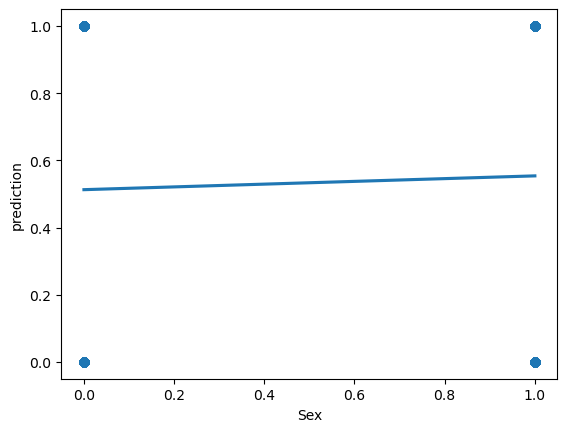

In [36]:
x = df2['Sex']
y = df2['prediction']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

<Axes: xlabel='Age', ylabel='prediction'>

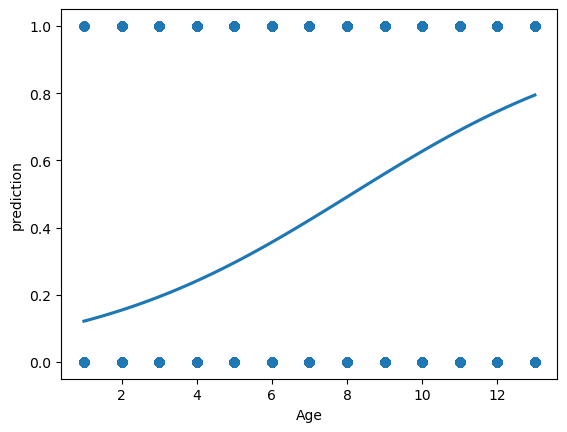

In [37]:
x = df2['Age']
y = df2['prediction']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

<Axes: xlabel='PhysActivity', ylabel='prediction'>

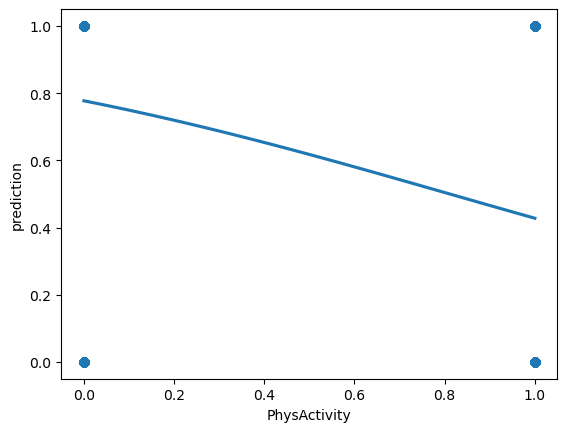

In [38]:
x = df2['PhysActivity']
y = df2['prediction']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

<Axes: xlabel='HighBP', ylabel='prediction'>

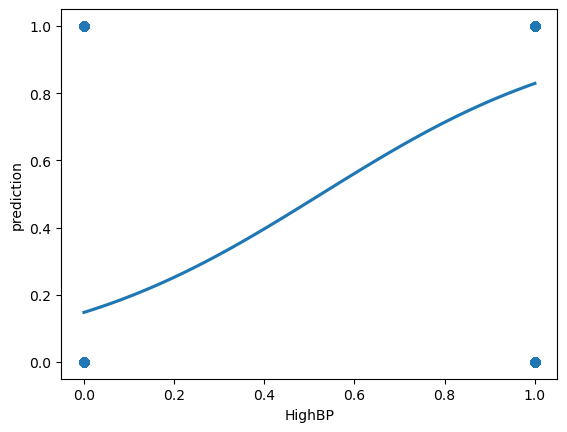

In [39]:
x = df2['HighBP']
y = df2['prediction']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True,ci=None)

<Axes: xlabel='HighChol', ylabel='prediction'>

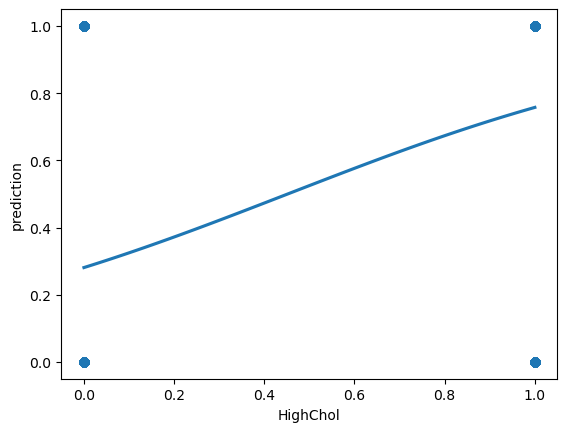

In [40]:
x = df2['HighChol']
y = df2['prediction']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

Both high cholesterol and high blood pressure appears to have more of a linear trend based on the data. It appears that a person with high cholesterol does have a higher chance of dealing with diabetes than a person with normal/low cholesterol. This trend is also seen with high blood pressure.

<Axes: xlabel='HeartDiseaseorAttack', ylabel='prediction'>

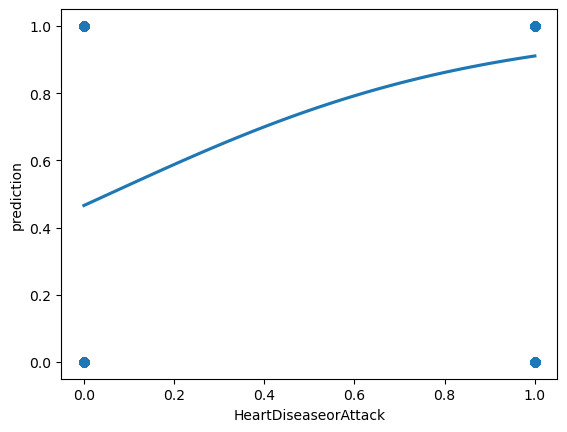

In [41]:
x = df2['HeartDiseaseorAttack']
y = df2['prediction']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

<Axes: xlabel='Income', ylabel='prediction'>

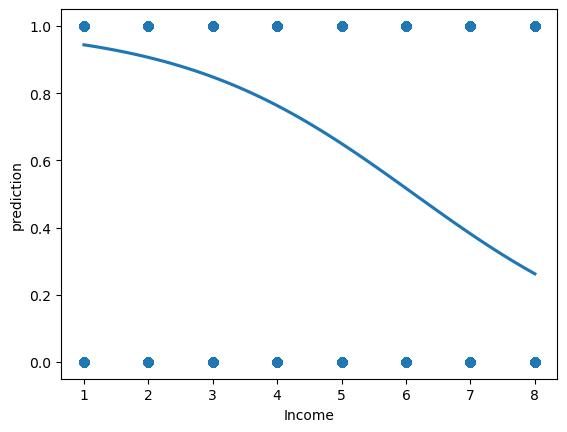

In [42]:
x = df2['Income']
y = df2['prediction']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

<Axes: xlabel='HvyAlcoholConsump', ylabel='prediction'>

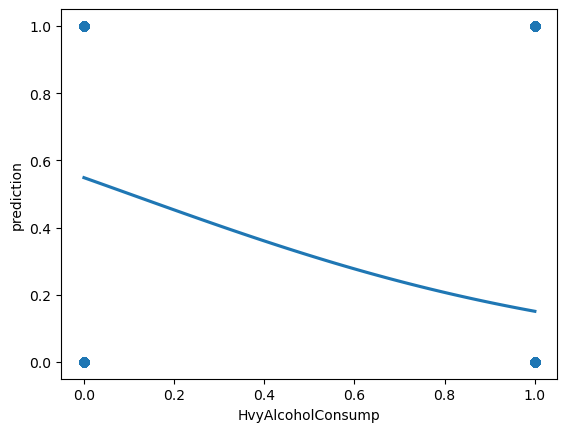

In [43]:
x = df2['HvyAlcoholConsump']
y = df2['prediction']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)